
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")

In [2]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

X = ha.drop('cp', axis = 1)
y = ha[['cp']]


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [3]:
pipeline = Pipeline(
    [
     ("KNN", KNeighborsClassifier())]
)

degrees = {'KNN__n_neighbors': list(range(1,100))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,99)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])



0    0.494411
Name: 71, dtype: float64


0    0.575219
Name: 1, dtype: float64


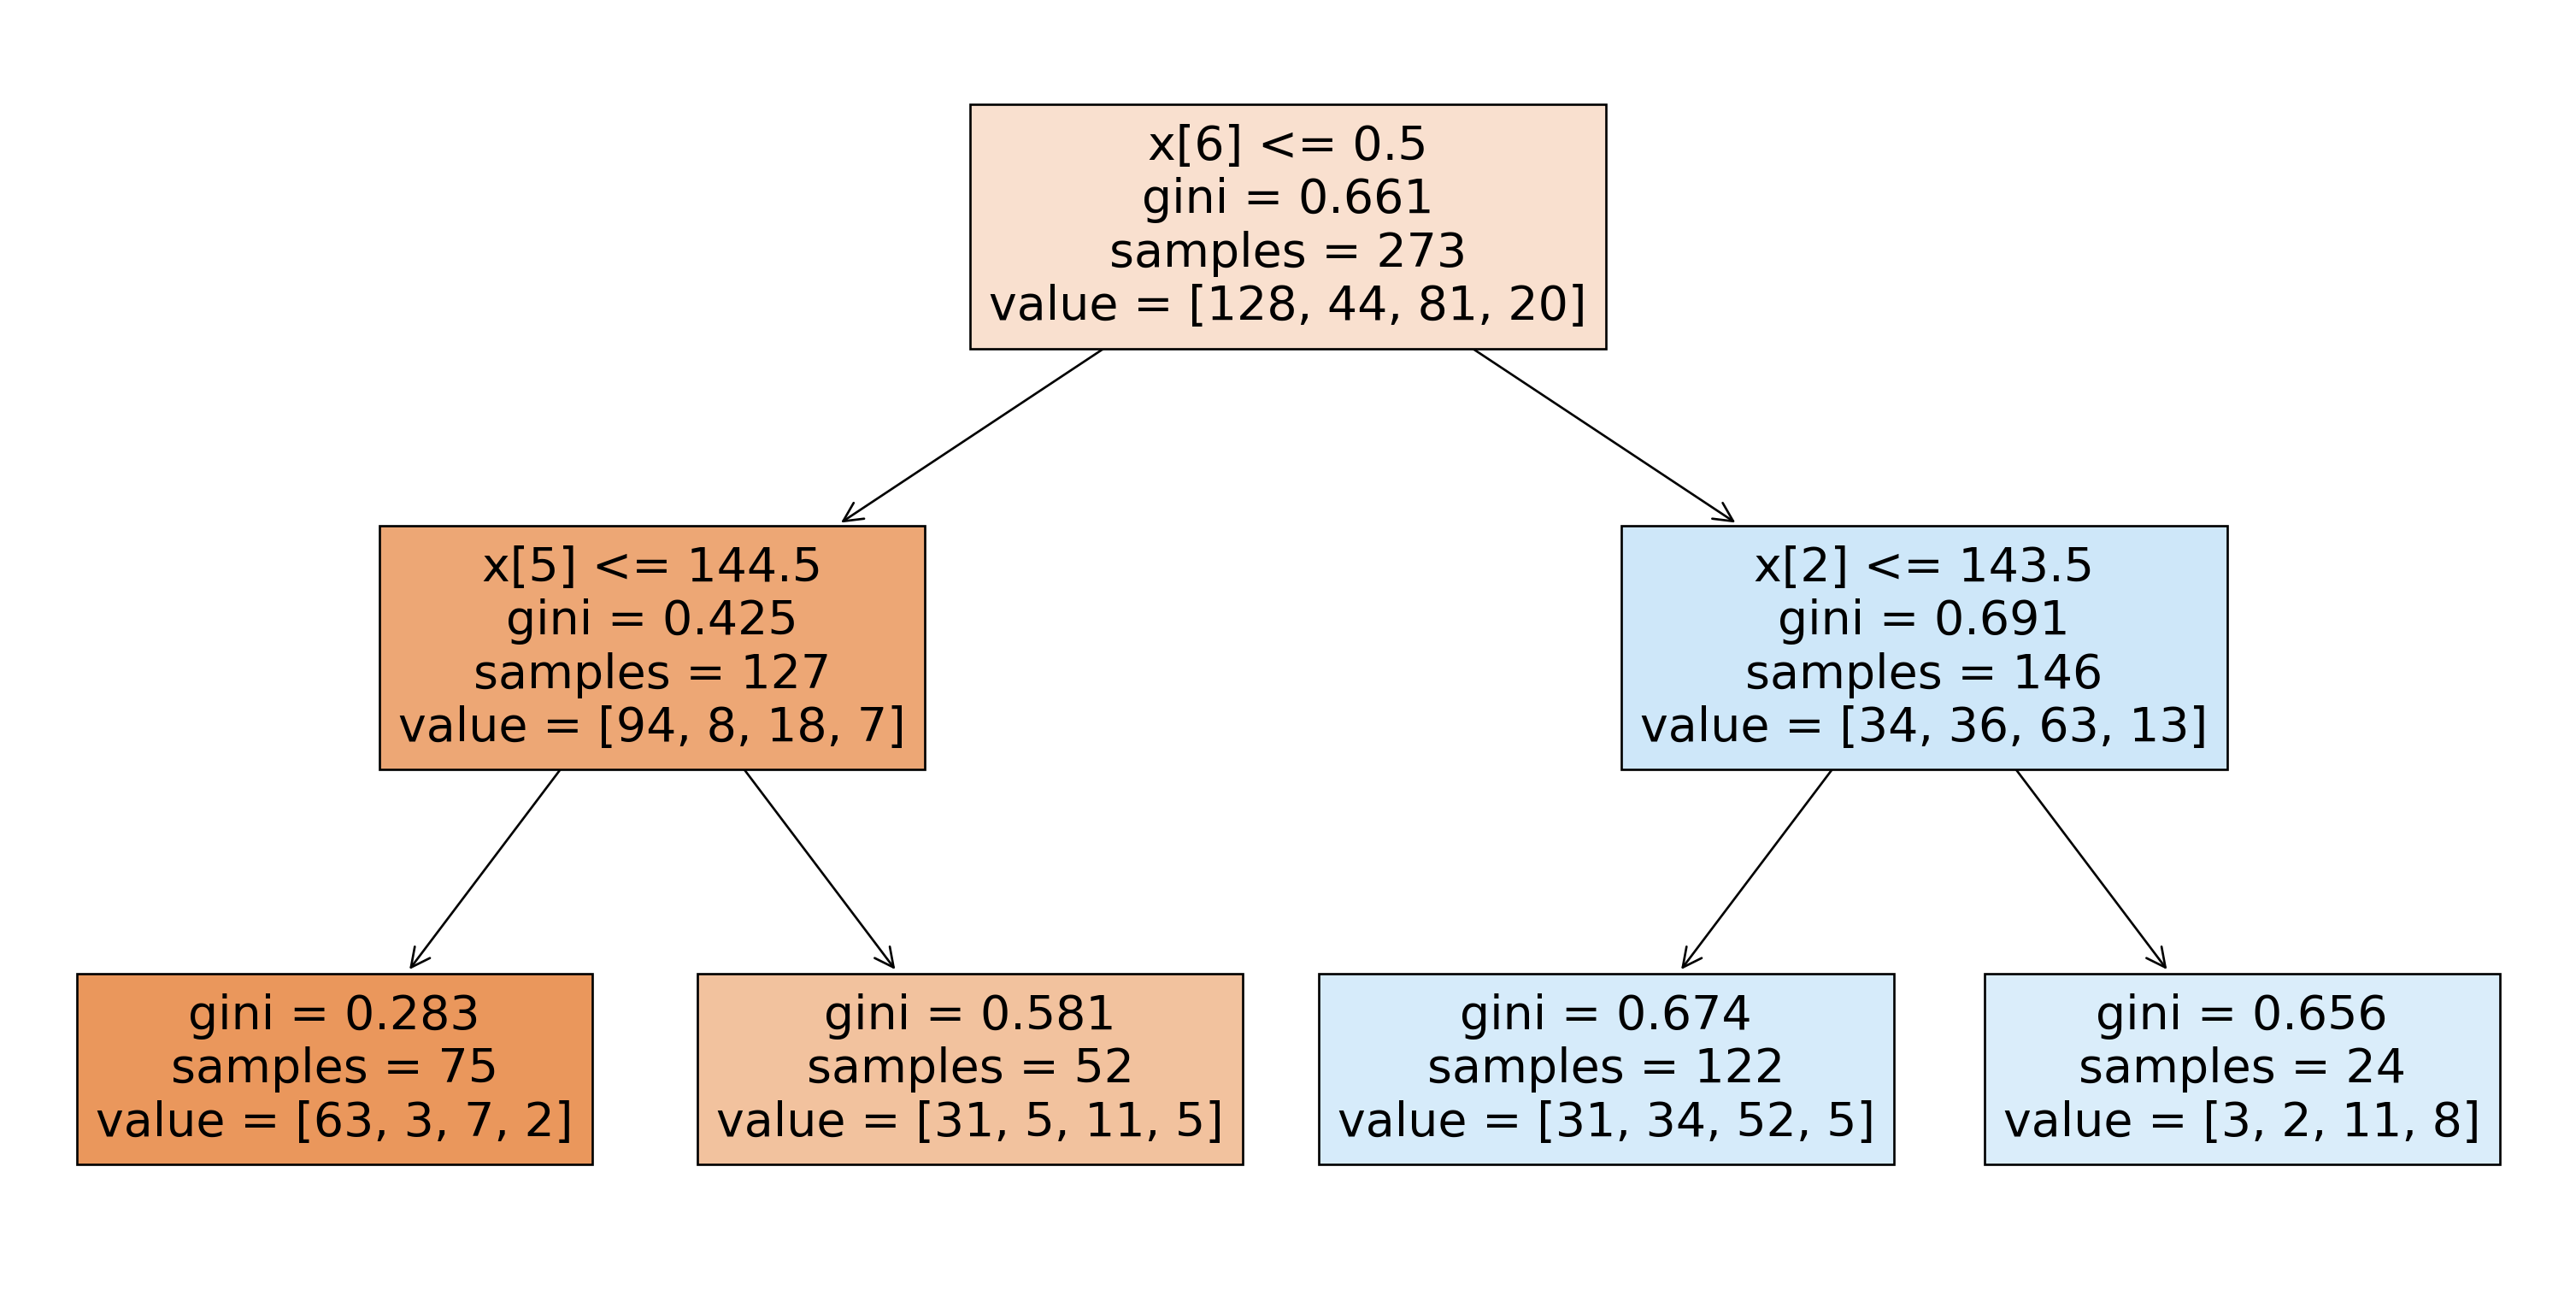

In [4]:
pipeline = Pipeline(
    [
     ("DT", DecisionTreeClassifier())]
)

degrees = {'DT__max_depth': list(range(0, 50))}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,50)

df = pd.DataFrame(reshape_scores)

print(df[df.max().idxmax()])

plt.figure(figsize=(20,10))
plot_tree(DecisionTreeClassifier(max_depth=2).fit(X,y), filled= True)
plt.show()

In [5]:
pipeline = Pipeline(
    [
     ("LDA", LinearDiscriminantAnalysis())]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'accuracy')

print(scores.mean())

0.5424242424242424


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [6]:
hat = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

hat['cp_is_3'] = hat['cp'].apply(lambda x: 1 if x == 3 else 0)

X = hat.drop(['cp', 'cp_is_3'], axis = 1)
y = hat[['cp_is_3']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.1, C = 0.001))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'f1')

print(scores.mean())

0
0
0.9267340067340066
0.0


In [7]:
hat = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

hat['cp_is_2'] = hat['cp'].apply(lambda x: 1 if x == 2 else 0)

X = hat.drop(['cp', 'cp_is_2'], axis = 1)
y = hat[['cp_is_2']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.2, C = 0.001))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'f1')

print(scores.mean())

1
0
0.7032996632996633
0.0


In [8]:
hat = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

hat['cp_is_1'] = hat['cp'].apply(lambda x: 1 if x == 1 else 0)

X = hat.drop(['cp', 'cp_is_1'], axis = 1)
y = hat[['cp_is_1']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.1, C = 0.001))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'f1')

print(scores.mean())

0
0
0.8388552188552187
0.0


In [9]:
hat = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

hat['cp_is_0'] = hat['cp'].apply(lambda x: 1 if x == 0 else 0)

X = hat.drop(['cp', 'cp_is_0'], axis = 1)
y = hat[['cp_is_0']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.1, C = 0.01))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'f1')

print(scores.mean())

0
3
0.6374410774410775


0.5628817090842584


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [10]:
ha01 = ha[ha['cp'].isin([0,1])]

ha02 = ha[ha['cp'].isin([0,2])]

ha03 = ha[ha['cp'].isin([0,3])]


In [11]:
X = ha01.drop(['cp'], axis = 1)
y = ha01[['cp']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.3, C = 0.01))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'roc_auc')

print(scores.mean())

2
1
0.7791596638655461
0.7431837606837607


In [12]:
X = ha02.drop(['cp'], axis = 1)
y = ha02[['cp']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.8, C = 0.01))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'roc_auc')

print(scores.mean())

7
1
0.6550522648083624
0.6504785067873302


In [13]:
X = ha03.drop(['cp'], axis = 1)
y = ha03[['cp']]

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet'))]
)

degrees = {'LR__l1_ratio': list(np.arange(0.1,1, 0.1)), 'LR__C': [0.001, 0.01, 0.1, 1 ,10, 100]}

gscv = GridSearchCV(pipeline, degrees, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

scores = gscv_fitted.cv_results_['mean_test_score']

reshape_scores = scores.reshape(-1,9)

df = pd.DataFrame(reshape_scores)

print(df.max().idxmax())
print(df[df.max().idxmax()].idxmax())

print(df.iloc[df[df.max().idxmax()].idxmax(), df.max().idxmax()])

pipeline = Pipeline(
    [
     ("LR", LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.1, C = 0.01))]
)

scores = cross_val_score(pipeline, X, y, cv=5, scoring = 'roc_auc')

print(scores.mean())

0
0
0.8648275862068966
0.563076923076923
